Data analytics lab. 5 

Tomasz Brania 13.04.2023

# Lab 5 - Using link functions to create generalized linear models

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checking dataset parameters

In [2]:
data = pd.read_csv('Airline_data.csv')
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [3]:
data.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


Prior model

In [4]:
model_prior = CmdStanModel(stan_file='accidents_model_prior.stan')

INFO:cmdstanpy:compiling stan file /home/volume_for_DA/Lab5/accidents_model_prior.stan to exe file /home/volume_for_DA/Lab5/accidents_model_prior
INFO:cmdstanpy:compiled model executable: /home/volume_for_DA/Lab5/accidents_model_prior


In [5]:
R = 1000
sim = model_prior.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=13042023,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df_prior = sim.draws_pd()
df_prior.head()

,lp__,accept_stat__,alpha,theta,n,lambda,y
0,0.0,0.0,2.46051,0.350216,1.98512,23.4701,21.0
1,0.0,0.0,2.18651,0.349604,2.00703,17.9605,17.0
2,0.0,0.0,2.27815,0.349798,2.01030,19.7144,21.0
3,0.0,0.0,2.02766,0.343423,2.00698,15.1335,13.0
4,0.0,0.0,2.57693,0.358642,1.99922,26.9487,23.0


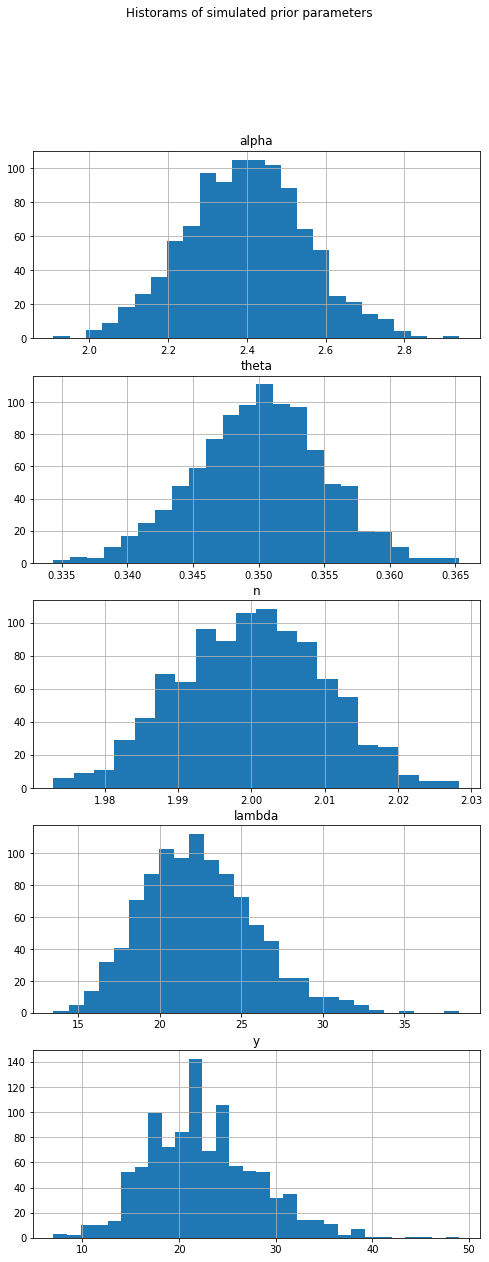

In [7]:
plt.figure(figsize=(8,20))
plt.suptitle('Historams of simulated prior parameters')
plt.subplot(511)
plt.title('alpha')
plt.hist(x=df_prior['alpha'], bins='auto')
plt.grid()
plt.subplot(512)
plt.title('theta')
plt.hist(x=df_prior['theta'], bins='auto')
plt.grid()
plt.subplot(513)
plt.title('n')
plt.hist(x=df_prior['n'], bins='auto')
plt.grid()
plt.subplot(514)
plt.title('lambda')
plt.hist(x=df_prior['lambda'], bins='auto')
plt.grid()
plt.subplot(515)
plt.title('y')
plt.hist(x=df_prior['y'], bins='auto')
plt.grid()

plt.show()

In [8]:
df_prior.describe()

,lp__,accept_stat__,alpha,theta,n,lambda,y
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,2.398030,0.350077,1.999935,22.418725,22.467000
std,0.0,0.0,0.152464,0.004971,0.009928,3.463081,5.742812
min,0.0,0.0,1.909490,0.334360,1.972990,13.492300,7.000000
25%,0.0,0.0,2.290532,0.346863,1.993023,19.935600,19.000000
50%,0.0,0.0,2.399380,0.350227,2.000135,22.121250,22.000000
75%,0.0,0.0,2.500075,0.353351,2.006873,24.571625,26.000000
max,0.0,0.0,2.939650,0.365309,2.028370,38.367300,49.000000


Posterior model

In [9]:
model_posterior = CmdStanModel(stan_file='accidents_model_posterior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
data_fit = {'N':data.shape[0], 'n_i':data['Miles flown [100 mln miles]'].values, 'y':data['Fatal accidents'].values}

In [11]:
fit = model_posterior.sample(data=data_fit, seed=13042023)
df_posterior = fit.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:02 Iteration: 1000 / 2000 [ 50%]  (Warmup)




chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:04 Iteration: 1700 / 


INFO:cmdstanpy:CmdStan done processing.


In [12]:
df_posterior.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,-1938.84,0.989891,0.003704,7.0,191.0,0.0,1939.78,2.53528,0.000083,15.0,12.0,22.0,25.0,15.0,21.0,22.0,16.0,29.0,18.0
1,-1937.84,0.854978,0.003704,2.0,3.0,0.0,1940.20,2.53660,0.000119,29.0,19.0,17.0,28.0,43.0,32.0,27.0,30.0,22.0,28.0
2,-1937.16,1.000000,0.003704,1.0,1.0,0.0,1937.65,2.53655,0.000111,21.0,25.0,18.0,20.0,21.0,29.0,23.0,26.0,18.0,36.0
3,-1937.77,0.894379,0.003704,9.0,563.0,0.0,1940.26,2.71583,0.000080,23.0,25.0,31.0,22.0,28.0,14.0,24.0,18.0,29.0,31.0
4,-1938.49,0.858741,0.003704,1.0,3.0,0.0,1938.49,2.71583,0.000089,19.0,22.0,16.0,26.0,27.0,22.0,18.0,32.0,31.0,18.0


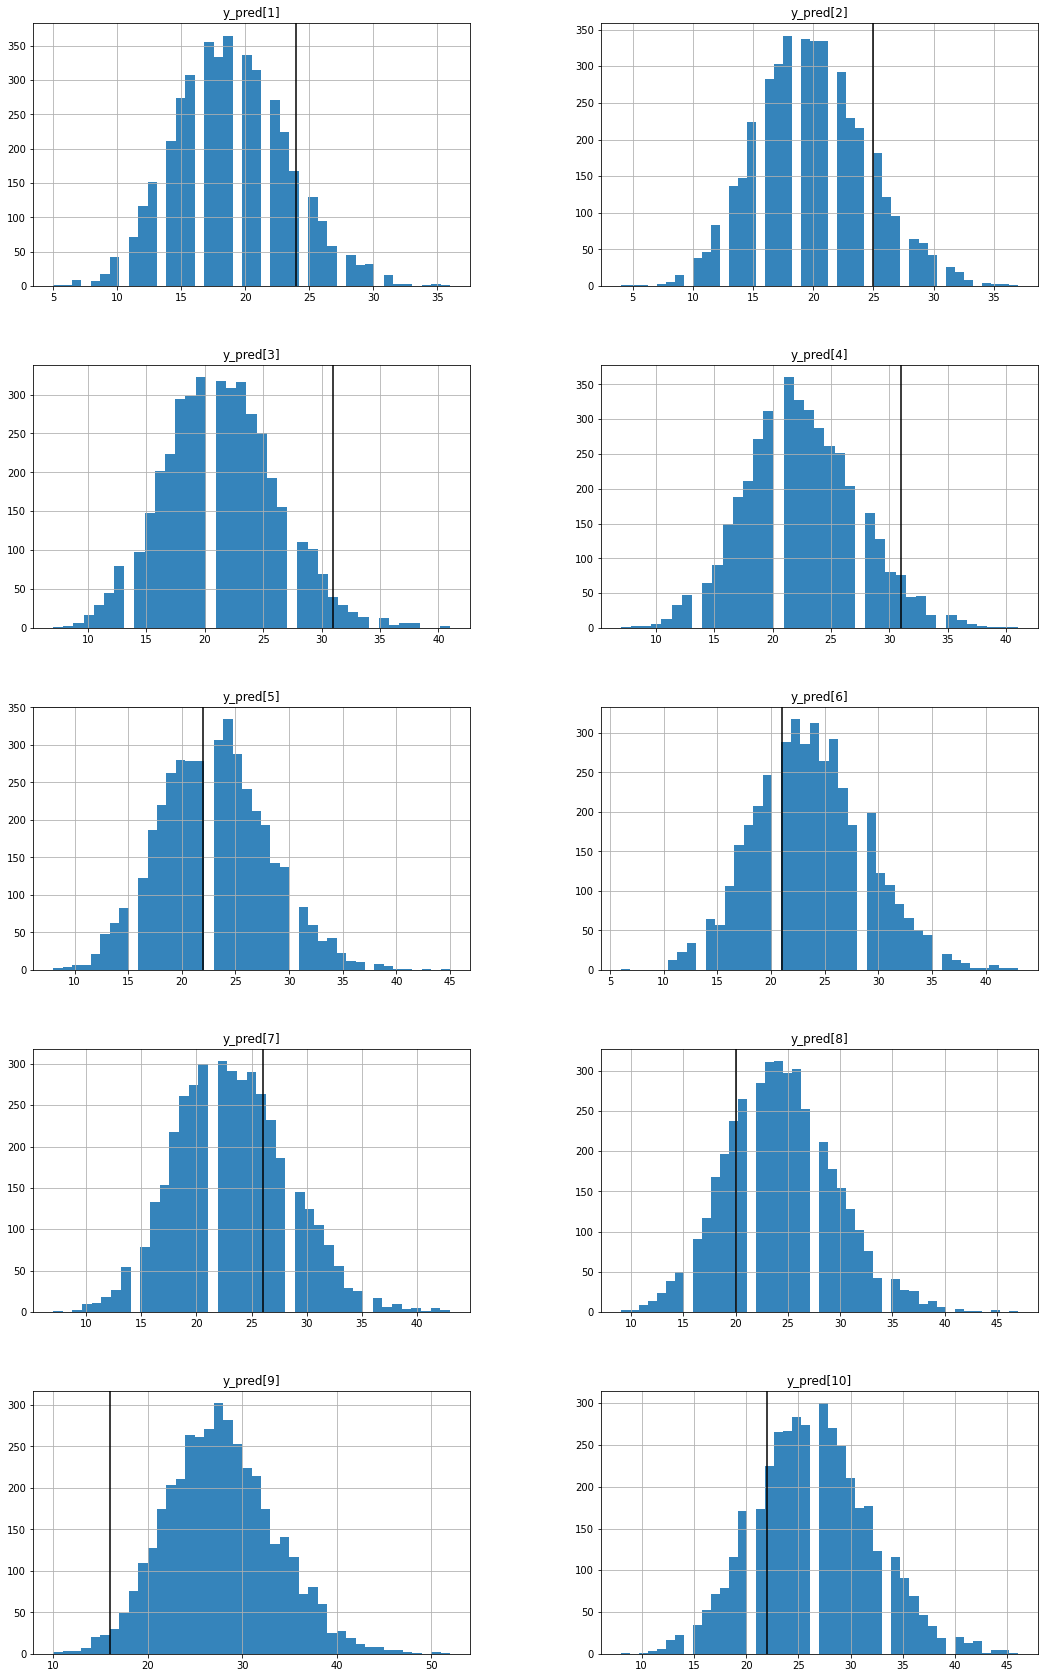

In [13]:
fig = df_posterior.loc[:, "y_pred[1]":].hist(bins='auto', alpha=0.9, layout=(5,2), figsize=(18, 30)).reshape((10))
for i in range(10):
    fig[i].axvline(data['Fatal accidents'][i], color='k')
plt.show()

Improved model

In [14]:
model_posterior = CmdStanModel(stan_file='accidents_model_improved.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
data_fit = {'N':data.shape[0], 'n_i':data['Miles flown [100 mln miles]'].values, 'y':data['Fatal accidents'].values}

In [16]:
fit = model_posterior.sample(data=data_fit, seed=13042023)
df_improved = fit.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:04 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:10 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:17 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:18 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:20 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:22 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:23 Iteration: 1200 / 2000 [ 60%


INFO:cmdstanpy:CmdStan done processing.


In [17]:
df_improved.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,y_pred[1],y_pred[2],y_pred[3],y_pred[4],y_pred[5],y_pred[6],y_pred[7],y_pred[8],y_pred[9],y_pred[10]
0,-1938.49,0.948799,0.003264,10.0,1023.0,0.0,1943.34,2.53891,2.52279,2.61396,...,21.0,21.0,31.0,21.0,23.0,15.0,21.0,21.0,27.0,30.0
1,-1938.39,0.999996,0.003264,10.0,1023.0,0.0,1941.48,2.54501,2.54941,2.55363,...,19.0,19.0,29.0,27.0,18.0,19.0,20.0,22.0,15.0,29.0
2,-1939.07,0.999221,0.003264,10.0,1023.0,0.0,1943.37,2.49636,2.52784,2.36395,...,17.0,24.0,18.0,28.0,26.0,7.0,29.0,21.0,29.0,27.0
3,-1937.31,0.942467,0.003264,10.0,1023.0,0.0,1942.91,2.57747,2.52391,2.64512,...,17.0,23.0,27.0,35.0,32.0,27.0,19.0,18.0,13.0,29.0
4,-1937.24,0.995349,0.003264,10.0,1023.0,0.0,1942.85,2.44772,2.48154,2.72189,...,12.0,17.0,39.0,29.0,22.0,24.0,19.0,14.0,35.0,33.0


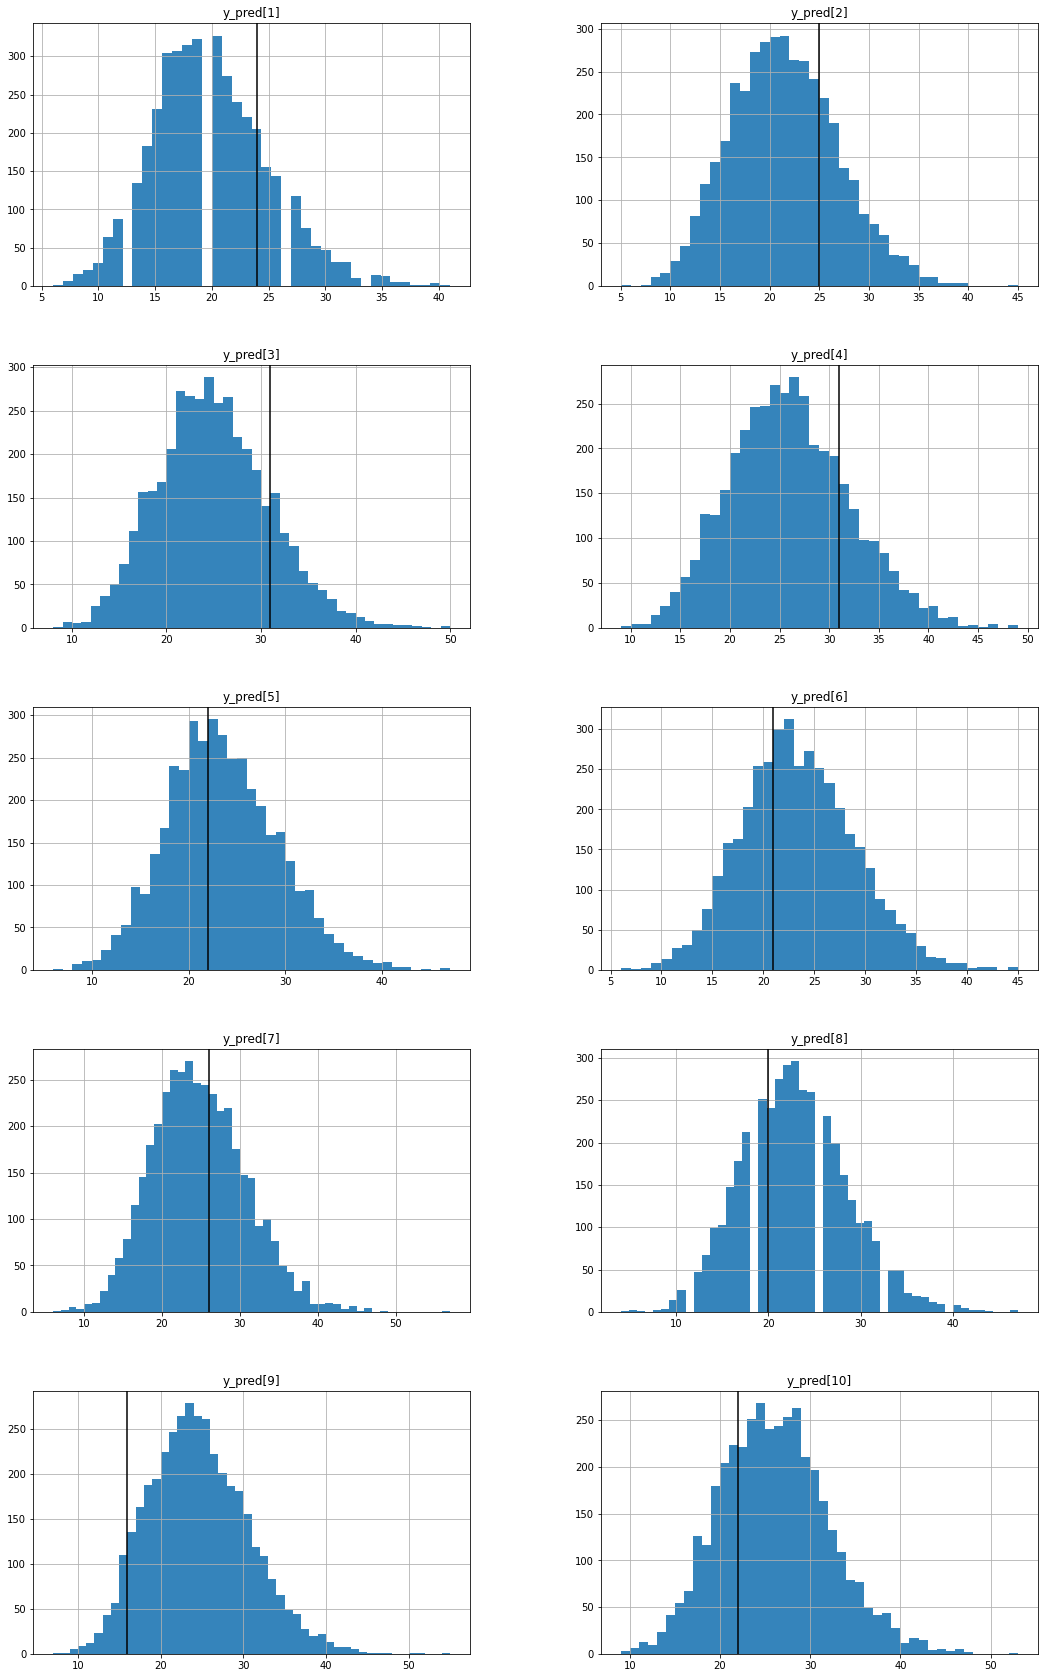

In [18]:
fig = df_improved.loc[:, "y_pred[1]":].hist(bins='auto', alpha=0.9, layout=(5,2), figsize=(18, 30)).reshape((10))
for i in range(10):
    fig[i].axvline(data['Fatal accidents'][i], color='k')
plt.show()

Conclusions:

Histograms for the improved model seems to be better fitted, so improved model perform better.